In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import os
os.chdir("/Users/quangphucvu/Library/CloudStorage/OneDrive-nyu.edu/multiplicity/Results")

In [15]:
df= pd.read_csv("fixed-cor-23-10-02.csv")
df["null_prob"]= pd.Categorical(df["null_prob"],categories=[1,0.7,0.5,0.3,0.1,0.05])
df["cor"]= df["cor"].astype("category")

In [16]:
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
boundaries = [0,0.01,0.03,0.05,0.0510,0.0520,0.053,0.055,0.075,0.1,1]
colors=["#E7F7D5",'#BBD4A6','#9BBF85',"#e6f048","#7b8219","#d9a50b","#F6D3A8","#D091BB",'#B3589A','#B3589A']
norm = matplotlib.colors.BoundaryNorm(boundaries=boundaries + [boundaries[-1]],ncolors=256)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
def heatmap_draw(axes=None,number_of_test=20,col="FWER_fwer_method",cbar=False,xlabel="",ylabel="",title="",linewidths=0.3,linecolor='white'):
    temp= df.loc[df['#test']==number_of_test,["null_prob","cor",col]]
    sns.heatmap(ax=axes,data=temp.pivot("cor","null_prob",col),cmap=cmap,
        norm=norm,cbar=cbar,xticklabels=["1",".7",".5",".3",".1",".05"],cbar_ax=cbar_ax,linewidths=linewidths,linecolor=linecolor,cbar_kws=dict(ticks=[0, .01, .03,.05,.051,.052,.053,.055,.075,.1,1]))
    axes.set_xlabel(xlabel,fontsize=7)
    axes.set_ylabel(ylabel)
    axes.set_title(title,fontsize=10)
    axes.set_yticklabels(labels=[0,0.1,0.3,0.5,0.7,0.9],rotation=0,size=8)
    axes.set_xticklabels(labels=["1",".7",".5",".3",".1",".05"],size=8,rotation=0)
    axes.tick_params(axis='x', which='both', bottom=False, top=False)
    axes.tick_params(axis='y', which='both', left=False, right=False)
    
    


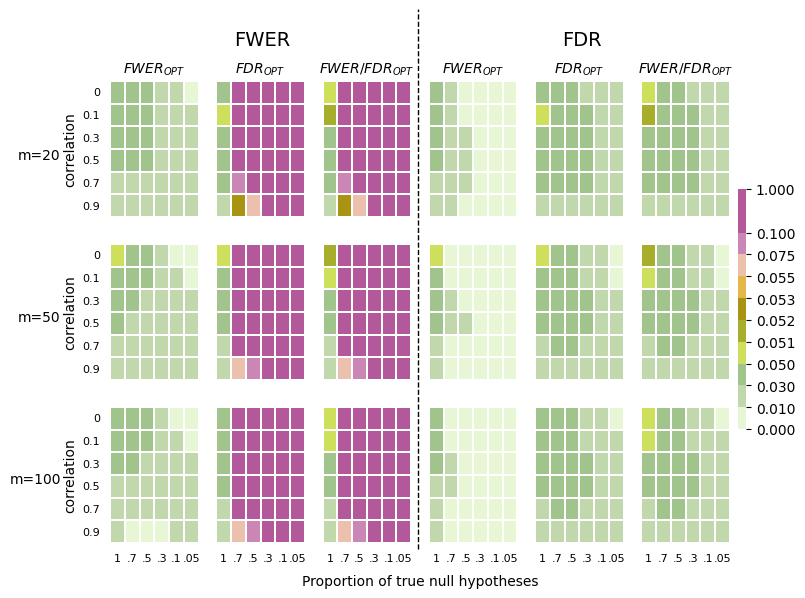

In [17]:
fig,axes = plt.subplots(3,6,sharex=True,sharey=True,figsize=(8,6))
cbar_ax = fig.add_axes([0.91, .3, .01, .4])

fig.text(0.28, 0.94, 'FWER',size=14)
fig.text(0.69, 0.94, 'FDR',size=14)
fig.text(0.01, 0.75, 'm=20',size=10)
fig.text(0.01, 0.48, 'm=50',size=10)
fig.text(0.00, 0.21, 'm=100',size=10)
fig.text(0.365, 0.04, 'Proportion of true null hypotheses',size=10)
heatmap_draw(number_of_test=20,axes=axes[0,0],col="FWER_fwer_method",ylabel="correlation",title="$FWER_{OPT}$")
heatmap_draw(number_of_test=20,axes=axes[0,3],col="FDR_fwer_method",title="$FWER_{OPT}$")
heatmap_draw(number_of_test=20,axes=axes[0,1],col="FWER_fdr_method",title="$FDR_{OPT}$")
heatmap_draw(number_of_test=20,axes=axes[0,4],col="FDR_fdr_method",title="$FDR_{OPT}$")
heatmap_draw(number_of_test=20,axes=axes[0,2],col="FWER_all",title="$FWER/FDR_{OPT}$")
heatmap_draw(number_of_test=20,axes=axes[0,5],col="FDR_all",title="$FWER/FDR_{OPT}$",cbar=True)
heatmap_draw(number_of_test=50,axes=axes[1,0],col="FWER_fwer_method",ylabel="correlation")
heatmap_draw(number_of_test=50,axes=axes[1,1],col="FWER_fdr_method")
heatmap_draw(number_of_test=50,axes=axes[1,2],col="FWER_all")
heatmap_draw(number_of_test=50,axes=axes[1,3],col="FDR_fwer_method")
heatmap_draw(number_of_test=50,axes=axes[1,4],col="FDR_fdr_method")
heatmap_draw(number_of_test=50,axes=axes[1,5],col="FDR_all")
heatmap_draw(number_of_test=100,axes=axes[2,0],col="FWER_fwer_method",ylabel="correlation")
heatmap_draw(number_of_test=100,axes=axes[2,1],col="FWER_fdr_method")
heatmap_draw(number_of_test=100,axes=axes[2,2],col="FWER_all")
heatmap_draw(number_of_test=100,axes=axes[2,3],col="FDR_fwer_method")
heatmap_draw(number_of_test=100,axes=axes[2,4],col="FDR_fdr_method")
heatmap_draw(number_of_test=100,axes=axes[2,5],col="FDR_all")
line = plt.Line2D([0.51, 0.51], [0.1, 1], color='black', linestyle='--', linewidth=1)
fig.add_artist(line)
plt.show()
